<a href="https://colab.research.google.com/github/Boris-Kuliev/My_First_Test_Repo/blob/main/code/%D0%9B%D0%A02_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Wind, m/s
0      15.18
1      15.84
2      16.60
3      14.98
4      13.28
...
     Wind, m/s
715       4.94
716       2.84
717       2.56
718       2.18
719       1.80


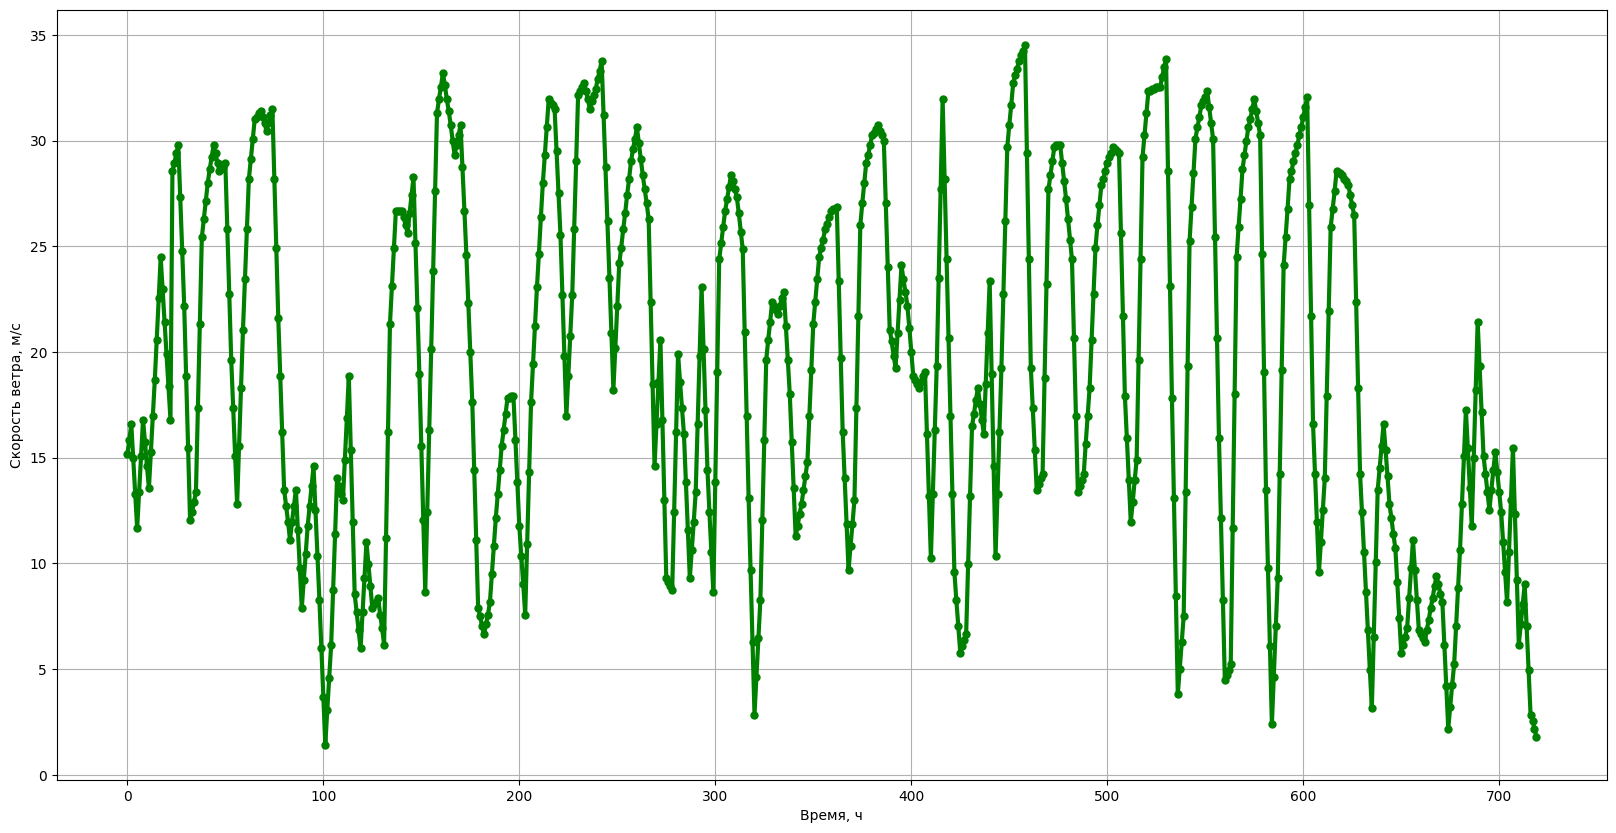

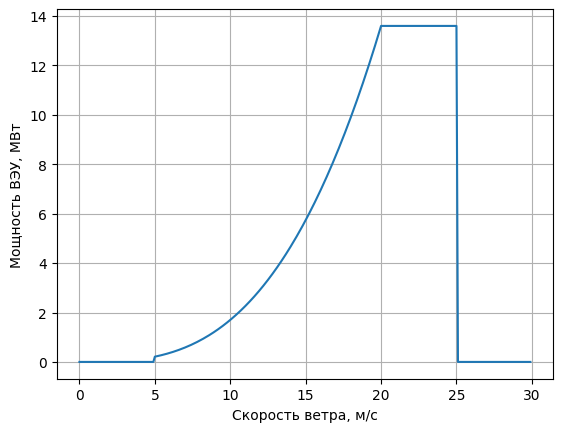

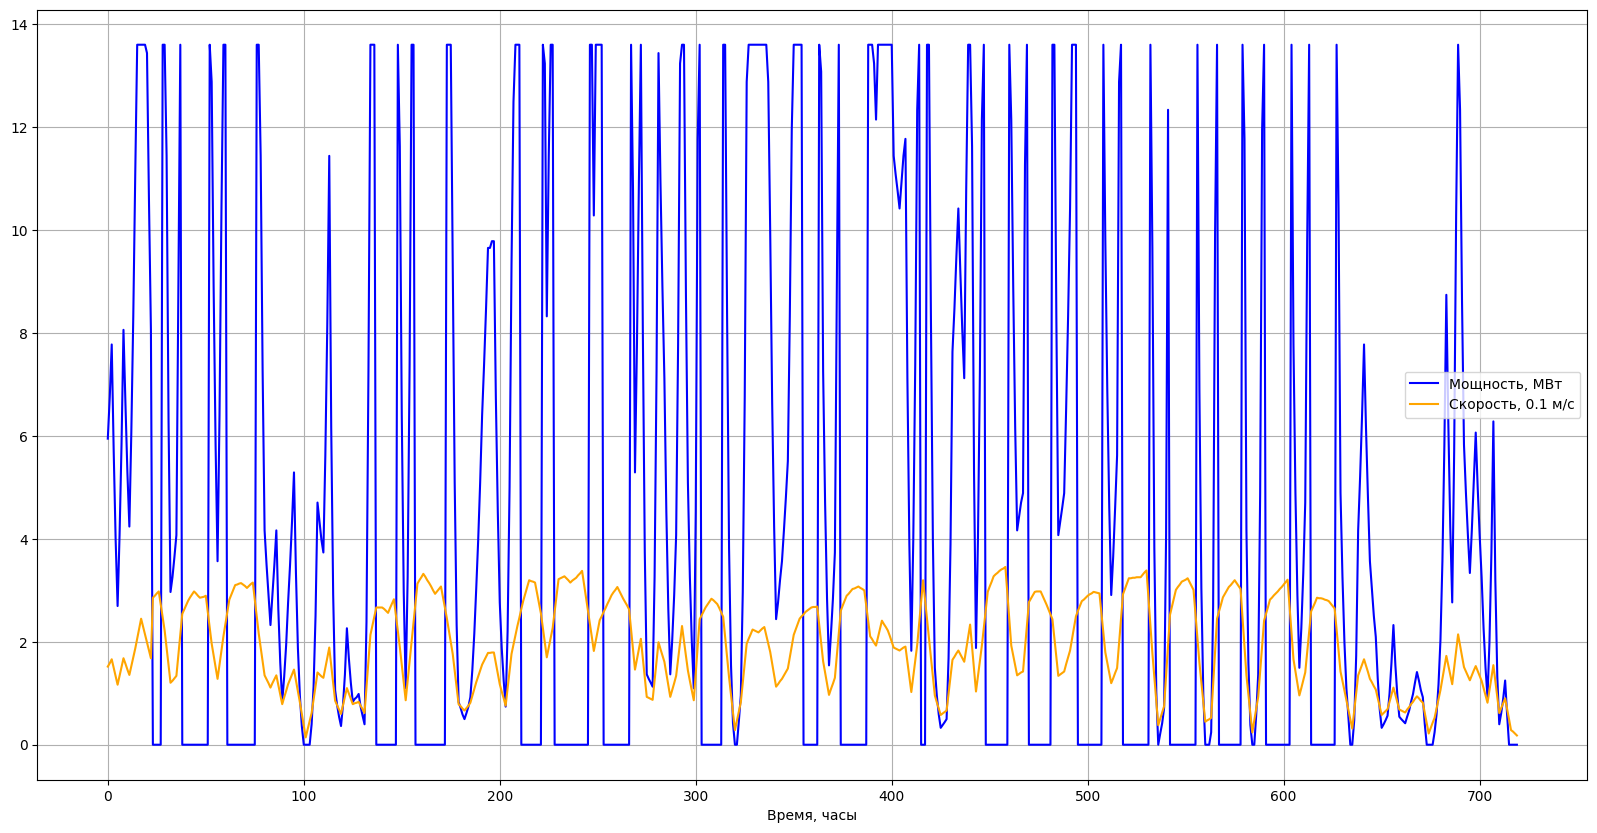

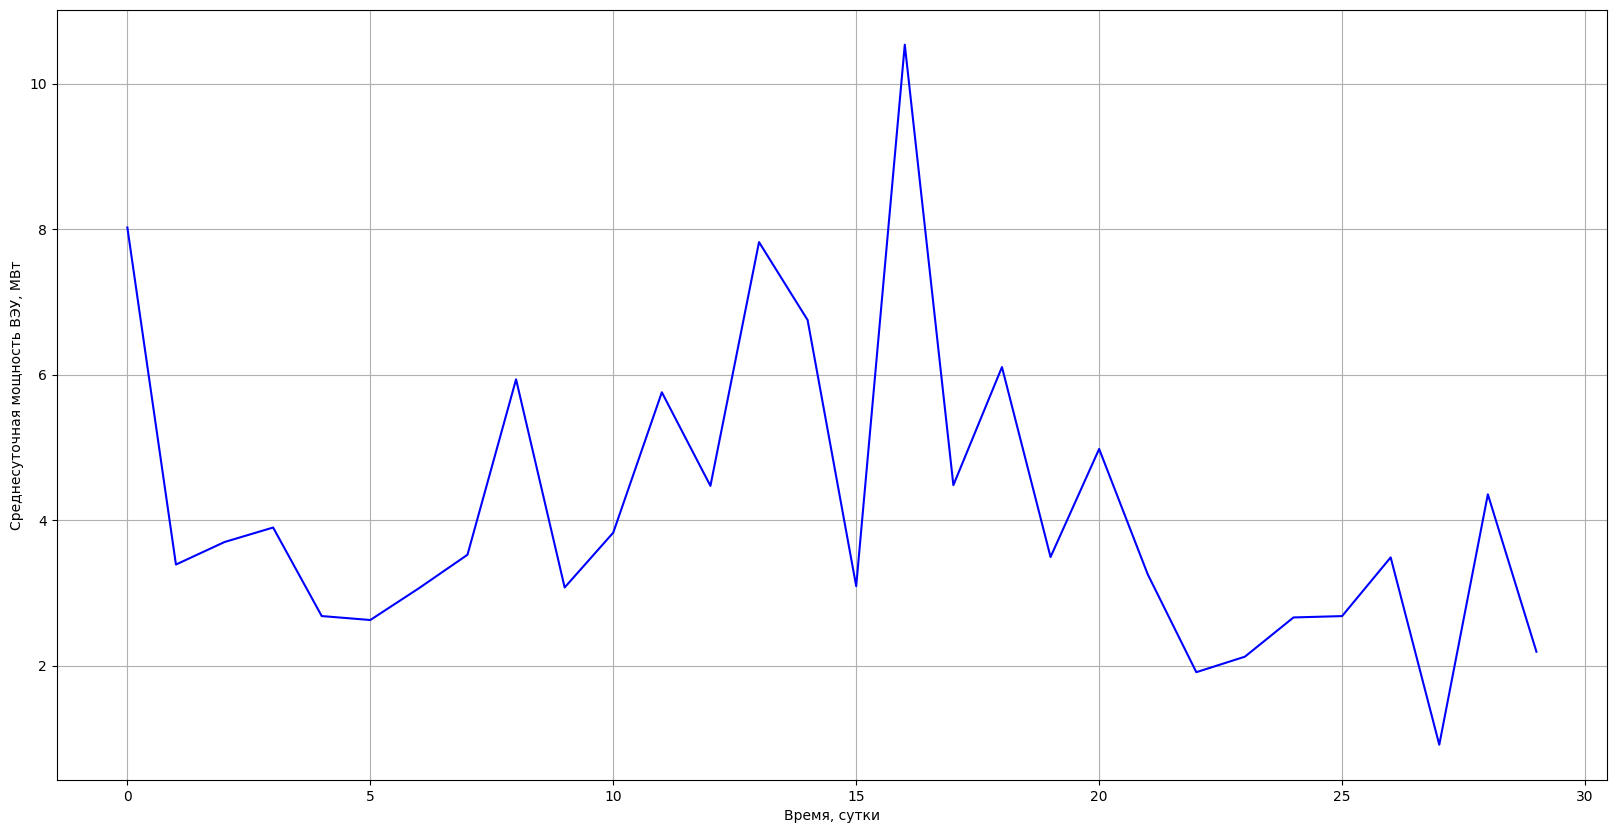

In [35]:
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков



# Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=1y94Eid5lB29n8e9ojVRG3zbTiHO_xm4i"

# чтение данных, разделитель столбцов можно не указывать, Pandas при чтении XLS файла сам его определит; 
# имена у столбцов в исходном файле есть, в первой строке, поэтому нужно указать header = 0.
input_df = pd.read_excel(url, header = 0) 

# вывод заголовка таблицы и первых пяти строк (сэмплов)
print(input_df.head(5))
print("...")
print(input_df.tail(5))

# Берем только временной ряд (почасовые значения) скорости ветра в м/с
# iloc - выделяет из таблицы указанный фрагмент, в данном случае все строки и только первый(0) столбец
wind_speed = input_df.iloc[: , 0].values

#print(wind_speed.shape)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(wind_speed, linewidth = 3, markersize = 5, marker='o', color = 'green')
ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.set_ylabel('Скорость ветра, м/с')

plt.show()

# Зададим зависимость среднечасовой мощности, вырабатываемой ВЭУ, от средней скорости ветра
def wind_speed_to_power(speed):
  min_speed = 5
  max_speed = 20
  critical_speed = 25
  
  # выработка равна нулю, если скорость ветра выше критической или ниже минимальной
  # поэтому обнуляем такую скорость
  speed_tmp = np.where(np.logical_or(speed > critical_speed, speed < min_speed), 0, speed)

  # если скорость выше максимальной, то выработка не будет расти, добавляем ограничение сверху 
  speed_tmp = np.clip(speed_tmp, a_min = None, a_max = max_speed)

  # на рабочем участке от min_speed до max_speed мощность пропорциональна кубу скорости
  power = 0.0017 * (speed_tmp) ** 3
  return power

# отдельно создается график зависимости выработки от скорости ветра
x = np.arange(0, 30, 0.1)
fig, ax = plt.subplots()
ax.plot(x, wind_speed_to_power(x))
ax.grid(True)
ax.set_xlabel('Скорость ветра, м/с') 
ax.set_ylabel('Мощность ВЭУ, МВт')
plt.show()

power = [wind_speed_to_power(v) for v in wind_speed]

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(wind_speed_to_power(wind_speed), color = 'blue')
ax.plot(wind_speed * 0.1, color = 'orange')
ax.grid(True)
ax.set_xlabel('Время, часы') 
ax.legend(['Мощность, МВт', 'Скорость, 0.1 м/с'])
plt.show()

powerByDays = [power[i:i + 24] for i in range(0, len(power), 24)]
avgDailyPower = [np.average(p) for p in powerByDays]

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(avgDailyPower, color = 'blue')
ax.grid(True)
ax.set_xlabel('Время, сутки') 
ax.set_ylabel('Среднесуточная мощность ВЭУ, МВт')
plt.show()


